In [2]:
from importlib import reload
import sys
import os
sys.path.append(os.path.abspath('../'))
import util
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
reload(util)
r0dm1 = util.load_data(0,-1)

# Kelp

In [4]:
kelp_raw = r0dm1[r0dm1['product'] == 'KELP'].set_index('timestamp')
kelp_raw.index = kelp_raw.index/100

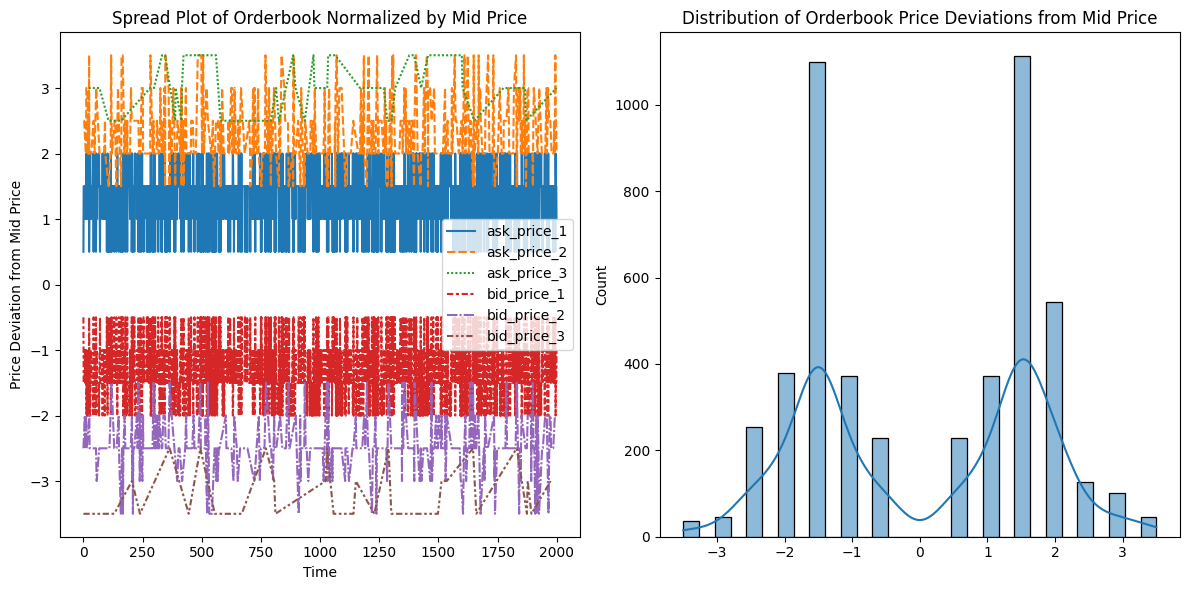

In [5]:
reload(util)
util.spread_plot(kelp_raw)

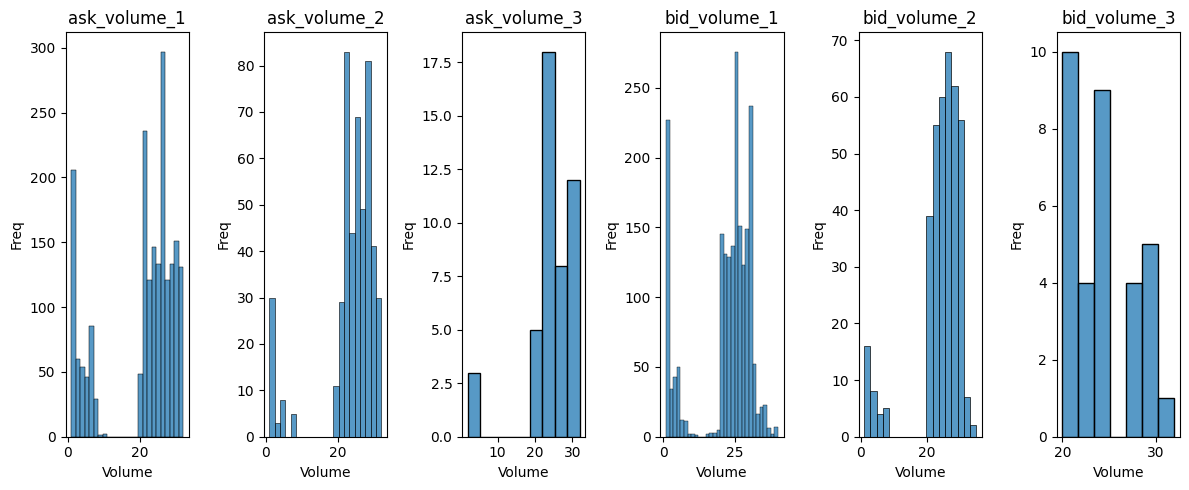

In [6]:
reload(util)
util.volume_plot(kelp_raw)

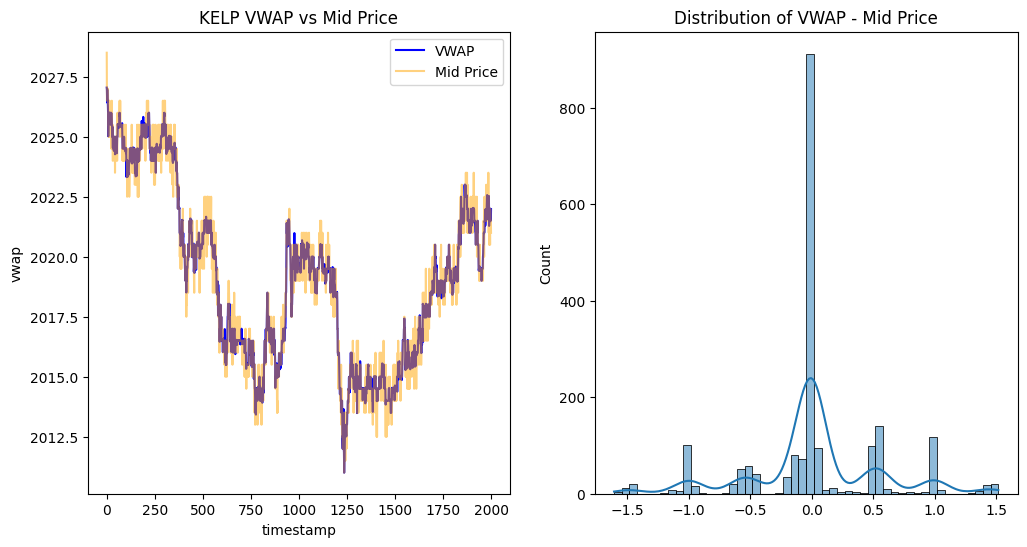

In [7]:
reload(util)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
kelp_raw['vwap'] = util.get_vwap(kelp_raw)
sns.lineplot(x=kelp_raw.index, y=kelp_raw['vwap'], ax = ax[0], label='VWAP', color='blue')
sns.lineplot(x=kelp_raw.index, y=kelp_raw['mid_price'], ax = ax[0], label='Mid Price', color='orange', alpha=0.5)
ax[0].set_title('KELP VWAP vs Mid Price')
sns.histplot(kelp_raw['vwap'] - kelp_raw['mid_price'], ax = ax[1], bins=50, kde=True)
ax[1].set_title('Distribution of VWAP - Mid Price')
plt.show()


In [10]:
kelp_ret = np.log(kelp_raw['vwap']).diff()

In [11]:
#ADF test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(kelp_ret.dropna())
result

(-55.79509312463766,
 0.0,
 0,
 1998,
 {'1%': -3.433627137787501,
  '5%': -2.8629876622368218,
  '10%': -2.5675406736265796},
 -28823.62645933823)

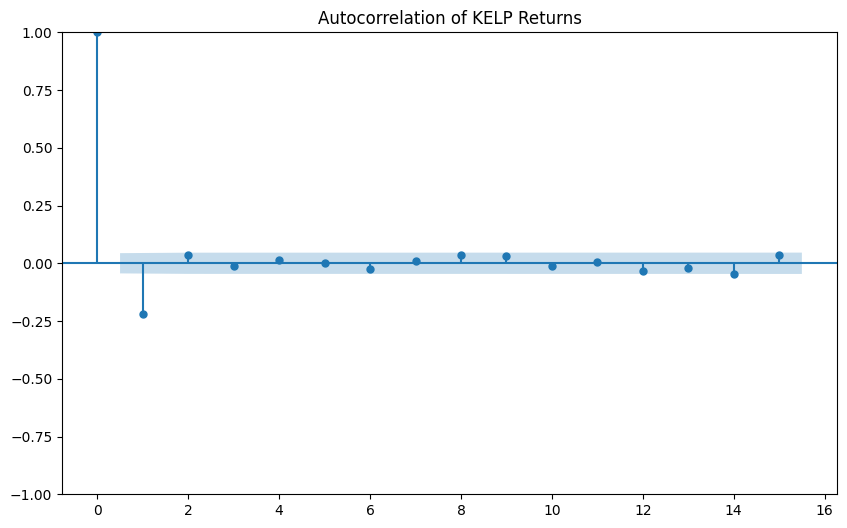

In [12]:
#autocorr plot
import statsmodels.api as sm

# Plot the autocorrelation of the returns
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(kelp_ret.dropna(), lags=15, ax=ax)
plt.title('Autocorrelation of KELP Returns')
plt.show()

In [13]:
in_sample_kelp = kelp_raw.loc[160:]
is_vwap = in_sample_kelp['vwap']
is_ret = np.log(is_vwap).diff()

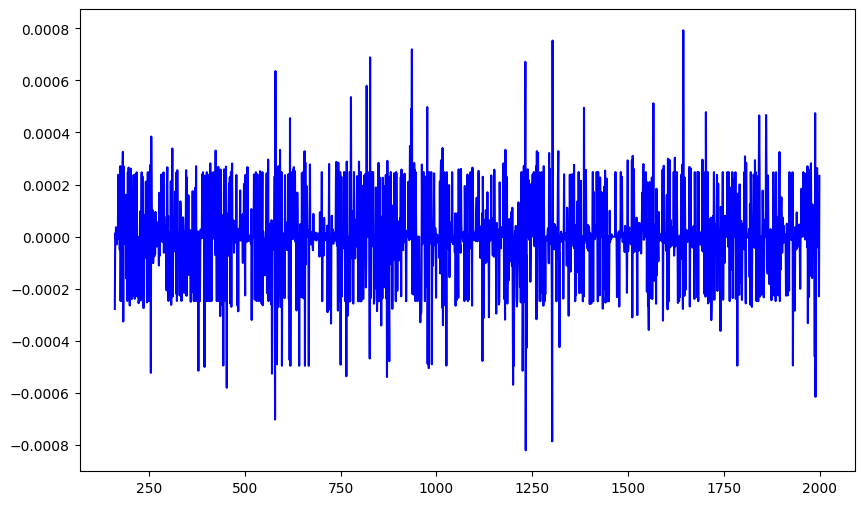

In [14]:
# lin reg
from sklearn.linear_model import LinearRegression

X = np.arange(len(is_ret)).reshape(-1, 1)
y = is_ret.values[1:]
model = LinearRegression()
model.fit(X[1:], y)
slope = model.coef_[0]
intercept = model.intercept_
pred = model.predict(X[1:])
residuals = y - pred
plt.figure(figsize=(10, 6))
plt.plot(is_ret.index[1:], is_ret.values[1:], label='Returns', color='blue')

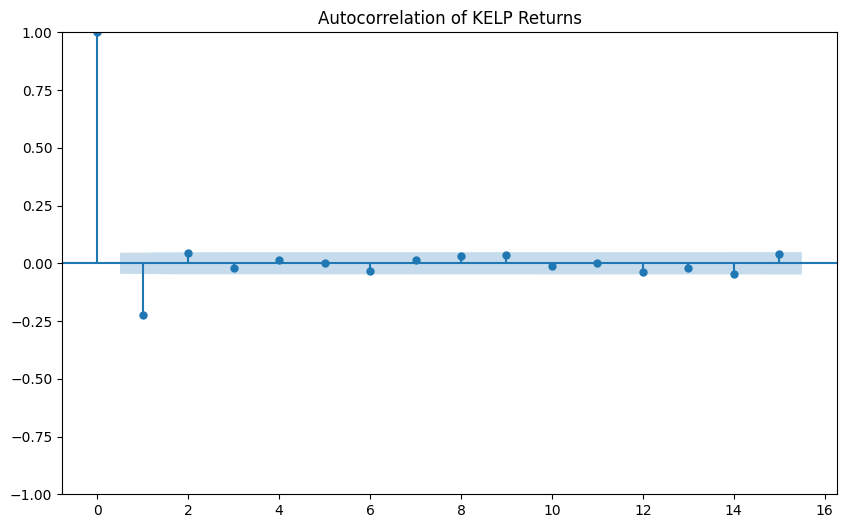

In [15]:
# Plot the autocorrelation of the returns
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=15, ax=ax)
plt.title('Autocorrelation of KELP Returns')
plt.show()

Can use last returns to preduct current returns? ADF test suggest to use r_{t-1} as a feature.

Also could mean short term reversion is a thing.

Thoughts for now.

We want to have some very short term reversal strategies.

Some ideas - 